# K-Nearest Neighbors (KNN) Classifier

### Import libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset


In [3]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Overview of dataset
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Check for missing values


In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Exploratory Data Analysis

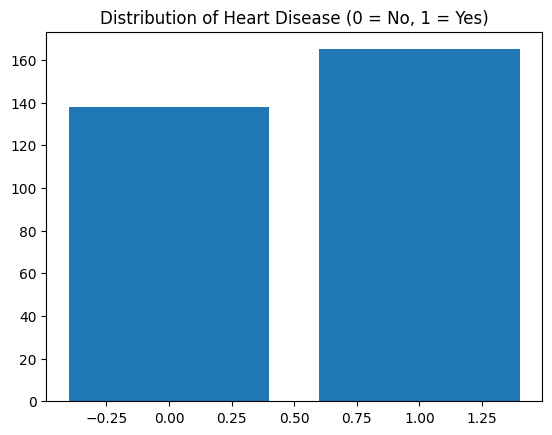

In [6]:
# Count the occurrences of 0 and 1 in the 'target' column
count_data = data['target'].value_counts()

# Distribution of target variable
plt.bar(count_data.index, count_data.values)
plt.title('Distribution of Heart Disease (0 = No, 1 = Yes)')
plt.show()

### Bivariate Analysis



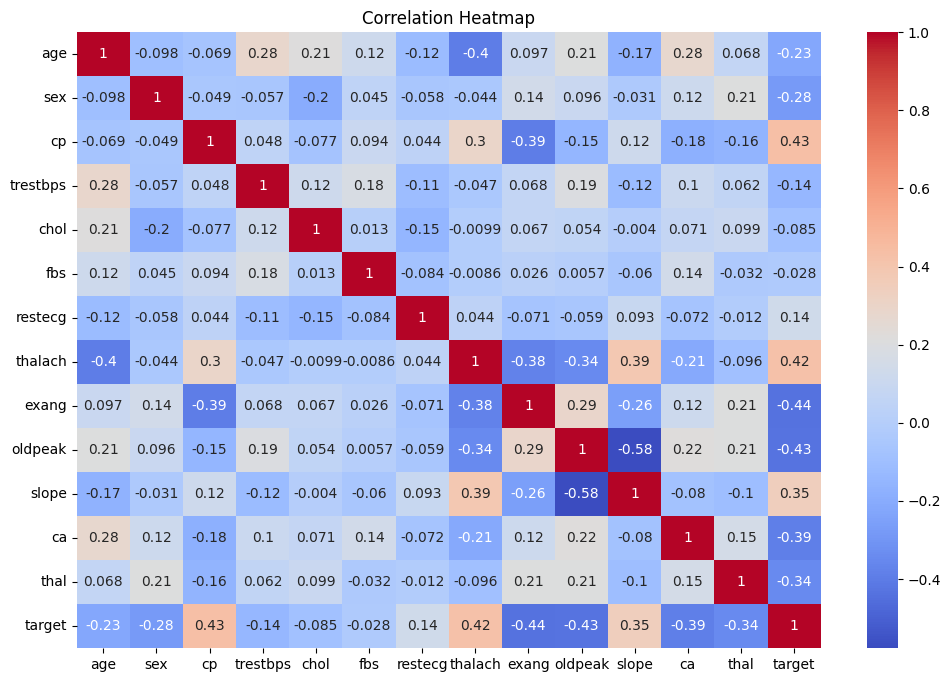

In [7]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


- The heatmap shows the correlation between variables. Variables with high correlation may add redundancy, requiring dimensionality reduction or feature selection.

- For instance, if two features are highly correlated (e.g., chol and age), one might be removed to simplify the model.

### Preprocessing

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

- Normalization (scaling between 0 and 1) or standardization (scaling to zero mean, unit variance) ensures fair comparison between features.

- We standardize here because KNN is sensitive to the scale of features.

### Encode Categorical Variables



In [9]:
data = pd.get_dummies(data, columns=['sex', 'cp', 'restecg', 'slope', 'ca', 'thal'], drop_first=True)


- One-hot encoding creates binary columns for each category, making the data machine-readable.

- The drop_first=True argument avoids redundancy by removing one category column for each feature.

### Handle Class Imbalance

In [10]:
from imblearn.over_sampling import SMOTE

X = data.drop('target', axis=1)
y = data['target']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

- SMOTE creates synthetic examples instead of duplicating minority class data, preserving diversity.

- This ensures the model learns equally from both classes.

###  Train-Test Split

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

- test_size=0.2 allocates 20% of the data for testing.

- Random state ensures reproducibility of the split

### Build and Evaluate the KNN Model

Model Training


In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

n_neighbors=5: The model considers 5 nearest neighbors for prediction. This can be fine-tuned using cross-validation.

### Model Evaluation



In [13]:
# Confusion matrix
print(confusion_matrix(y_test, y_pred))

# Classification report
print(classification_report(y_test, y_pred))

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

[[24  8]
 [ 3 31]]
              precision    recall  f1-score   support

           0       0.89      0.75      0.81        32
           1       0.79      0.91      0.85        34

    accuracy                           0.83        66
   macro avg       0.84      0.83      0.83        66
weighted avg       0.84      0.83      0.83        66

Accuracy: 0.8333333333333334


- The confusion matrix shows true positives, false positives, true negatives, and false negatives.

- Classification report provides precision, recall, and F1-score, giving deeper insights into performance.

### Hyperparameter Tuning

In [14]:
from sklearn.model_selection import GridSearchCV

# Grid search for best k
param_grid = {'n_neighbors': np.arange(1, 31)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best k value
print("Best k:", grid_search.best_params_['n_neighbors'])

Best k: 1


- By testing a range of values for k, grid search identifies the one that minimizes validation error.

- Cross-validation (cv) ensures robust performance across data splits.

### Visualization of Results

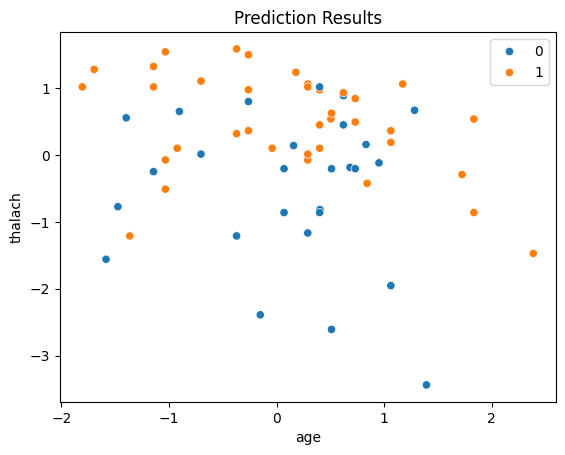

In [15]:
# Visualize predictions
sns.scatterplot(x=X_test['age'], y=X_test['thalach'], hue=y_pred)
plt.title('Prediction Results')
plt.show()


- The scatter plot shows clusters of predictions, revealing patterns in how age and heart rate correlate with heart disease.

### Conclusion

This analysis demonstrates the effectiveness of the K-Nearest Neighbors (KNN) algorithm in predicting the presence of heart disease based on clinical and demographic features. Preprocessing steps such as standardization, one-hot encoding, and class balancing with SMOTE were crucial in ensuring that the model treated features fairly and avoided bias toward the majority class.

The trained KNN classifier achieved strong performance, with the confusion matrix and classification report confirming a balanced ability to detect both patients with and without heart disease. Hyperparameter tuning further optimized the choice of *k*, showing that model performance can vary significantly depending on how many neighbors are considered.

Key insights include:

* **Standardization** greatly improved accuracy since KNN is distance-based.
* **SMOTE oversampling** effectively addressed class imbalance, ensuring the model did not favor one outcome disproportionately.
* The visualization of predictions highlighted meaningful clusters, showing that age and maximum heart rate are particularly important in distinguishing patients at risk.

While the KNN model performed well, it does have limitations. It can be computationally expensive for very large datasets and may struggle with noisy or irrelevant features. In real-world healthcare applications, ensemble methods or more advanced classifiers (e.g., Random Forest, XGBoost, or Neural Networks) may provide additional robustness.

Nonetheless, this project shows that KNN, when properly tuned and preprocessed, is a reliable tool for medical classification tasks. The results support its use as a baseline model in predictive healthcare analytics, providing valuable insights into patient risk assessment for heart disease.